In [2]:
# leer archivo data/IPH_robos_2021_2024_tecmty.xlsx
import pandas as pd

df = pd.read_excel("data/IPH_robos_2021_2024_tecmty.xlsx")
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE
0,3196367,2024-01-01 00:00:00,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12
1,3196186,2024-01-01 00:00:00,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15
2,3196158,2024-01-01 00:00:00,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35
3,3195958,2024-01-01 00:00:00,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77
4,3195921,2024-01-01 00:00:00,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57


In [3]:
df.isnull().sum()

FOLIO        0
FECHA        0
HORA         0
MINUTO       0
TIPO         0
VIOLENCIA    0
LATITUD      0
LONGITUD     0
DISTRITO     0
CUADRANTE    0
dtype: int64

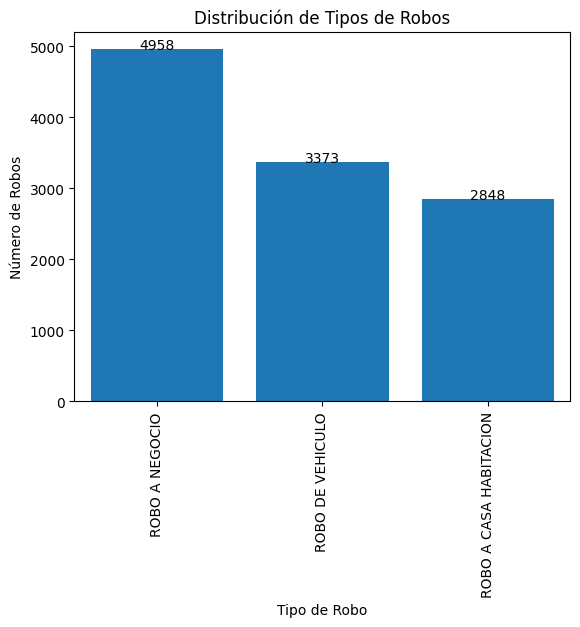

In [4]:
# visualizar distribución de tipos de robos
df['TIPO'].value_counts().plot(kind='bar', title='Distribución de Tipos de Robos')

# poner encima de cada barra el número de robos
import matplotlib.pyplot as plt

counts = df['TIPO'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribución de Tipos de Robos')
plt.xlabel('Tipo de Robo')
plt.ylabel('Número de Robos')
for i, v in enumerate(counts.values):
    plt.text(i, v + 5, str(v), ha='center')
plt.show()

In [5]:
# visualizar los valores unicos de las columnas
print('Los valores únicos para la columna HORA son:', df['HORA'].unique())
print('----------------------------------------------------------------')
print('Los valores únicos para la columna MINUTO son:', df['MINUTO'].unique())
print('----------------------------------------------------------------')
print('Los valores únicos para la columna TIPO son:', df['TIPO'].unique())
print('----------------------------------------------------------------')
print('Los valores únicos para la columna VIOLENCIA son:', df['VIOLENCIA'].unique())
print('----------------------------------------------------------------')
print('Los valores únicos para la columna DISTRITO son:', df['DISTRITO'].unique())
print('----------------------------------------------------------------')
print('Los valores únicos para la columna CUADRANTE son:', df['CUADRANTE'].unique())

Los valores únicos para la columna HORA son: [99  4  9 11 16 23  5  6  8 10 15 21  7 12 20 13 18  3 19  1  2 14 17 22
  0]
----------------------------------------------------------------
Los valores únicos para la columna MINUTO son: [99 34 31 35 33 55 47  0  4 18 23 15 41 32 10 27 30 43 52  8 13 44  5  2
 20 38  7 36 25 48 50 56 39 45  1 12 40 22 37 57 19  3 21 14 51 59 54 58
 29 42 24 16 26  9 28 11 17 53  6 46 49]
----------------------------------------------------------------
Los valores únicos para la columna TIPO son: ['ROBO A CASA HABITACION' 'ROBO DE VEHICULO' 'ROBO A NEGOCIO']
----------------------------------------------------------------
Los valores únicos para la columna VIOLENCIA son: ['NO' 'SI']
----------------------------------------------------------------
Los valores únicos para la columna DISTRITO son: ['Colón' 'Ángel' 'Zapata' 'Morelos' 'Villa' 'Diana']
----------------------------------------------------------------
Los valores únicos para la columna CUADRANTE s

In [6]:
# ver si hay duplicados en las columna de FOLIO
print('La cantidad de datos duplicados en la columna FOLIO es:', df['FOLIO'].duplicated().sum())
print('----------------------------------------------------------------')
print('La cantidad de datos duplicados en la columna LATITUD es:', df['LATITUD'].duplicated().sum())
print('----------------------------------------------------------------')
print('La cantidad de datos duplicados en la columna LONGITUD es:', df['LONGITUD'].duplicated().sum())


La cantidad de datos duplicados en la columna FOLIO es: 716
----------------------------------------------------------------
La cantidad de datos duplicados en la columna LATITUD es: 938
----------------------------------------------------------------
La cantidad de datos duplicados en la columna LONGITUD es: 929


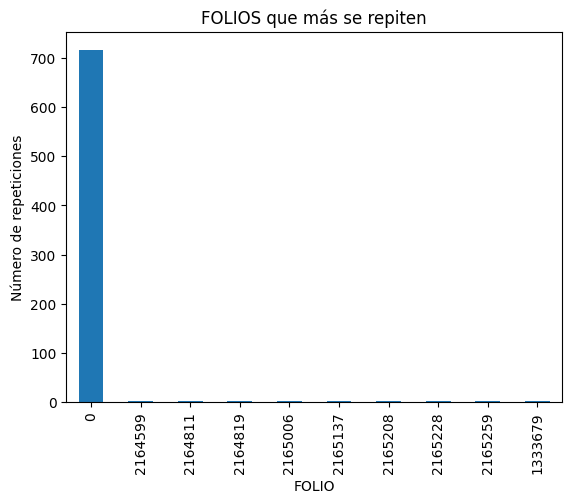

In [7]:
# visualizar el datos en FOLIO que mas se repite
df['FOLIO'].value_counts().head(10).plot(kind='bar', title='FOLIOS que más se repiten')
plt.xlabel('FOLIO')
plt.ylabel('Número de repeticiones')
plt.show()

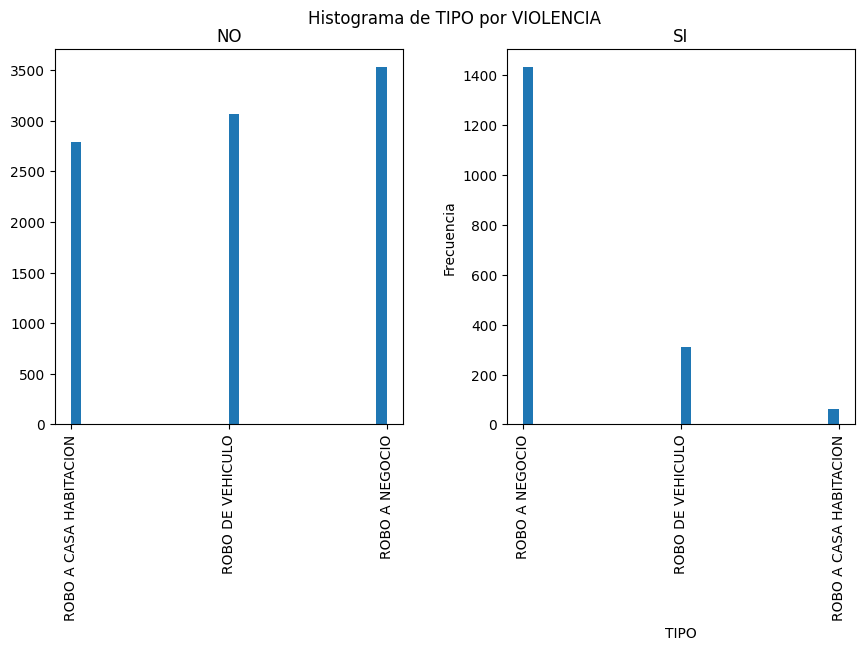

In [8]:
# realizar un hiograma de la columna TIPO, en la y poner la variable de VIOLENCIA
df.hist(column='TIPO', by='VIOLENCIA', bins=30, figsize=(10, 5))
plt.suptitle('Histograma de TIPO por VIOLENCIA')
plt.xlabel('TIPO')
plt.ylabel('Frecuencia')
plt.show()

In [9]:
# ver que tipo de dato es FECHA
print('El tipo de dato de la columna FECHA es:', df['FECHA'].dtype)

El tipo de dato de la columna FECHA es: object


In [10]:
# visualizar si hay datos nulos en la columna FECHA
print('La cantidad de datos nulos en la columna FECHA es:', df['FECHA'].isnull().sum())

La cantidad de datos nulos en la columna FECHA es: 0


In [11]:
# convertir la columna FECHA a tipo fecha
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')

In [12]:
# crear la columna mes y año a partir de la columna FECHA
df['MES'] = df['FECHA'].dt.month
df['AÑO'] = df['FECHA'].dt.year
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,1.0,2024.0
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,1.0,2024.0
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,1.0,2024.0
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,1.0,2024.0
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,1.0,2024.0


In [13]:
# crear columna trimestre, semestre y estación del año a partir de la columna FECHA
df['TRIMESTRE'] = df['FECHA'].dt.quarter
df['SEMESTRE'] = df['FECHA'].dt.month.apply(lambda x: 1 if x <= 6 else 2)
df['ESTACION'] = df['FECHA'].dt.month.apply(lambda x: 'Invierno' if x in [12, 1, 2] else ('Primavera' if x in [3, 4, 5] else ('Verano' if x in [6, 7, 8] else 'Otoño')))
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,1.0,2024.0,1.0,1,Invierno
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,1.0,2024.0,1.0,1,Invierno
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,1.0,2024.0,1.0,1,Invierno
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,1.0,2024.0,1.0,1,Invierno
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,1.0,2024.0,1.0,1,Invierno


In [14]:
# agregar variable de dia de la semana, donde 0 es lunes y 6 es domingo
df['DIA'] = df['FECHA'].dt.dayofweek
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,1.0,2024.0,1.0,1,Invierno,0.0
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,1.0,2024.0,1.0,1,Invierno,0.0
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,1.0,2024.0,1.0,1,Invierno,0.0
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,1.0,2024.0,1.0,1,Invierno,0.0
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,1.0,2024.0,1.0,1,Invierno,0.0


In [15]:
# crear columna franja horaria
def franja_horaria(hora):
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noche'
    else:
        return 'Desconocido'

df['FRANJA HORARIA'] = df['HORA'].apply(franja_horaria)
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA,FRANJA HORARIA
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido


In [16]:
# crear columna de VIOLENCIA_BIN donde si es con violencia es 1 y sin violencia es 0
df['VIOLENCIA_BIN'] = df['VIOLENCIA'].apply(lambda x: 1 if x == 'SI' else 0)
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA,FRANJA HORARIA,VIOLENCIA_BIN
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0


In [17]:
# crear columna ROBO A NEGOCIO donde si el TIPO es 'ROBO A NEGOCIO' es 1 y si no es 0
df['ROBO A NEGOCIO'] = df['TIPO'].apply(lambda x: 1 if x == 'ROBO A NEGOCIO' else 0)
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA,FRANJA HORARIA,VIOLENCIA_BIN,ROBO A NEGOCIO
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0,0
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0,0
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0,0
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0,1
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0,0


In [18]:
# crear columna ROBO A CASA HABITACION donde si el TIPO es 'ROBO A CASA HABITACION' es 1 y si no es 0
df['ROBO A CASA HABITACION'] = df['TIPO'].apply(lambda x: 1 if x == 'ROBO A CASA HABITACION' else 0)
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA,FRANJA HORARIA,VIOLENCIA_BIN,ROBO A NEGOCIO,ROBO A CASA HABITACION
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0,0,1
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0,0,0
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0,0,1
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0,1,0
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,1.0,2024.0,1.0,1,Invierno,0.0,Desconocido,0,0,0


In [19]:
# crear columna ROBO DE VEHICULO donde si el TIPO es 'ROBO DE VEHICULO' es 1 y si no es 0
df['ROBO DE VEHICULO'] = df['TIPO'].apply(lambda x: 1 if x == 'ROBO DE VEHICULO' else 0)
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,...,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA,FRANJA HORARIA,VIOLENCIA_BIN,ROBO A NEGOCIO,ROBO A CASA HABITACION,ROBO DE VEHICULO
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,...,2024.0,1.0,1,Invierno,0.0,Desconocido,0,0,1,0
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,...,2024.0,1.0,1,Invierno,0.0,Desconocido,0,0,0,1
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,...,2024.0,1.0,1,Invierno,0.0,Desconocido,0,0,1,0
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,...,2024.0,1.0,1,Invierno,0.0,Desconocido,0,1,0,0
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,...,2024.0,1.0,1,Invierno,0.0,Desconocido,0,0,0,1


/tmp/ipykernel_26340/4034453755.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M').size()


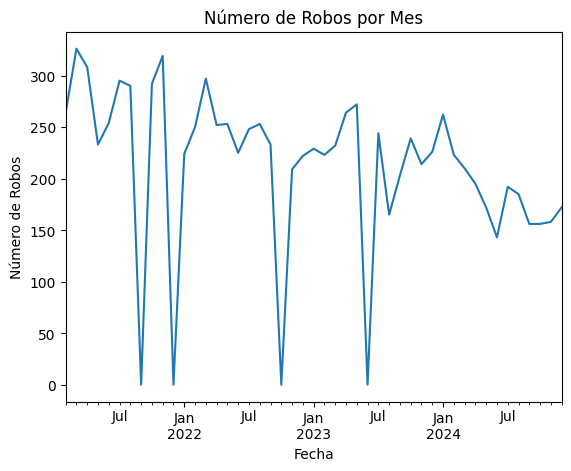

In [20]:
# visualizar patrones temporales con un series de tiempos
df.set_index('FECHA', inplace=True)
df_resampled = df.resample('M').size()
df_resampled.plot(title='Número de Robos por Mes')
plt.xlabel('Fecha')
plt.ylabel('Número de Robos')
plt.show()